In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_df = pd.read_pickle('data/main_df_ver01.pkl')
main_df.head(10)

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2006-12-28,12501,1.267400e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-29,12463,1.615600e+08,NaN,NaN,NaN,NaN,12501.0,NaN,NaN,NaN,NaN
2006-12-30,12465,1.946880e+08,NaN,NaN,NaN,NaN,12463.0,12501.0,NaN,NaN,NaN
2006-12-31,12467,2.278160e+08,NaN,NaN,NaN,NaN,12465.0,12463.0,12501.0,NaN,NaN
2007-01-01,12469,2.609440e+08,NaN,NaN,NaN,NaN,12467.0,12465.0,12463.0,12501.0,NaN
2007-01-02,12472,2.940720e+08,0.160,0.738,0.102,-0.9851,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.119,0.772,0.109,-0.4451,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.192,0.744,0.064,-0.9994,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.114,0.823,0.063,-0.9972,12480.0,12474.0,12472.0,12469.0,12467.0


In [3]:
main_df = main_df.dropna()
main_df

,Close,Volume,neg,neu,pos,compound,t_1,t_2,t_3,t_4,t_5
Date,,,,,,,,,,,
2007-01-02,12472,2.940720e+08,0.160,0.738,0.102,-0.9851,12469.0,12467.0,12465.0,12463.0,12501.0
2007-01-03,12474,3.272000e+08,0.119,0.772,0.109,-0.4451,12472.0,12469.0,12467.0,12465.0,12463.0
2007-01-04,12480,2.590600e+08,0.192,0.744,0.064,-0.9994,12474.0,12472.0,12469.0,12467.0,12465.0
2007-01-05,12398,2.352200e+08,0.114,0.823,0.063,-0.9972,12480.0,12474.0,12472.0,12469.0,12467.0
2007-01-06,12406,2.313133e+08,0.083,0.827,0.090,0.9720,12398.0,12480.0,12474.0,12472.0,12469.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,19945,1.585400e+08,0.160,0.743,0.097,-0.9837,19942.0,19939.0,19936.0,19933.0,19918.0
2016-12-28,19833,1.883500e+08,0.150,0.748,0.102,-0.9845,19945.0,19942.0,19939.0,19936.0,19933.0
2016-12-29,19819,1.720400e+08,0.116,0.780,0.104,-0.3421,19833.0,19945.0,19942.0,19939.0,19936.0


In [7]:
train_end = '2014-12-31'
test_start = '2015-01-01'
train_x = main_df.loc[:train_end]
test_x = main_df.loc[test_start:]
train_y = train_x.Close
test_y = test_x.Close
train_x = train_x.drop(columns='Close')
test_x = test_x.drop(columns='Close')

In [8]:
rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [10]:
pred = rf.predict(test_x)
pred = pd.DataFrame(data=pred, index=test_x.index, columns=['pred'])
pred

,pred
Date,
2015-01-01,17776.83
2015-01-02,17792.17
2015-01-03,17779.26
2015-01-04,17694.22
2015-01-05,17554.32
...,...
2016-12-27,17971.85
2016-12-28,17981.64
2016-12-29,17972.79


In [12]:
mean_squared_error(test_y, pred)

209439.70571027402

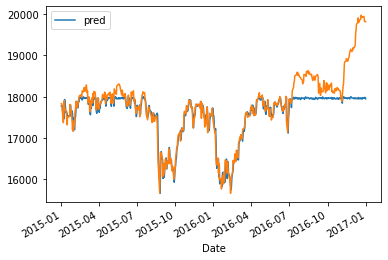

In [13]:
ax = pred.plot()
fig = test_y.plot(ax=ax)

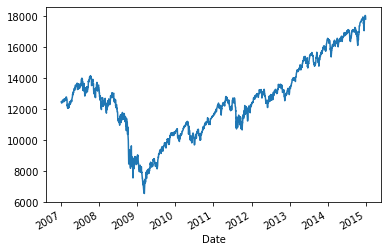

In [15]:
train_y.plot();